## **Laboratorio #4**

Stefanie M. Alvarez Pérez, 20002045

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso  #Regresión de lasso (Penaliza betas, más grande beta, mejor el modelo)
from sklearn.feature_selection import SelectFromModel

### 3. Selección de Variables

In [59]:
X_train = pd.read_csv("prep_Xtrain.csv") #Importar la data ya pre-procesada
X_test = pd.read_csv("prep_Xtest.csv")

In [60]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,0.0,0.560191,0.125,0.166667,0.0,1.0
1,0.5,1.0,0.308872,0.125,0.333333,0.0,0.0
2,1.0,1.0,0.365578,0.000,0.000000,0.0,1.0
3,1.0,0.0,0.120382,0.000,0.333333,0.0,1.0
4,1.0,0.0,0.195778,0.000,0.000000,0.0,0.5


In [61]:
y_train = pd.read_csv("prep_ytrain.csv")
y_test = pd.read_csv("prep_ytest.csv")

y_train.head()

,Survived
0,1
1,0
2,0
3,0
4,1


In [62]:
pd.unique(X_train['Embarked'])

array([1. , 0. , 0.5])

In [63]:
#objeto selector de variables
#Con Lasso introducimos alpha para penalizarlo a cuanto debería valer Beta

sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=0))

sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [64]:
sel_.get_support().sum() #Vector que devuelve cuántas variables quedan al final

5

In [65]:
sel_.get_support() #Con cuáles sí me quedé, después de la penalización

array([ True,  True,  True,  True, False, False,  True])

In [66]:
selected_features = X_train.columns[(sel_.get_support())]

In [67]:
selected_features #Obtener los nombres de las variables que sí tenemos que usar (38)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked'], dtype='object')

In [69]:
#Generar un CSV con las variables a usar
pd.Series(selected_features).to_csv('selected_features.csv', index=False)

### 4. Entrenamiento del Modelo

In [70]:
#Seleccionar solo las variables filtradas anteriormente
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [71]:
#AQUI VA EL MODELO
linear_model = Lasso(alpha=0.001, random_state=2022)

linear_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=2022)

#### Predicciones

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
preds_train = linear_model.predict(X_train)

In [74]:
#Resultados del Train
print("MSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_train), np.exp(preds_train))))

print("RMSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_train), 
                                                           np.exp(preds_train), squared=False)))

print("R2 de Entrenamiento: {}".format(r2_score(np.exp(y_train), np.exp(preds_train))))

MSE de Entrenamiento: 0.4110924067311674
RMSE de Entrenamiento: 0.6411648826403138
R2 de Entrenamiento: 0.41084774946570113


In [75]:
preds_test = linear_model.predict(X_test)

In [76]:
#Resultados del Test
print("MSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_test), np.exp(preds_test))))

print("RMSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_test), 
                                                           np.exp(preds_test), squared=False)))

print("R2 de Entrenamiento: {}".format(r2_score(np.exp(y_test), np.exp(preds_test))))

#Como el RMSE es más pequeño para test que para train, quiere decir que es mejor test para predecir

MSE de Entrenamiento: 0.5671982411520513
RMSE de Entrenamiento: 0.7531256476525356
R2 de Entrenamiento: 0.19101870220203265


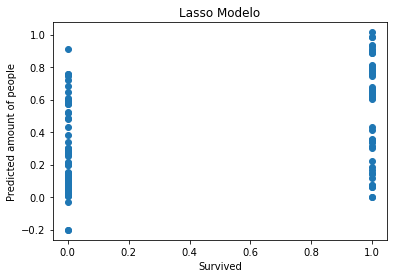

In [78]:
#Comparar en una gráfica de puntos el y_test (Valor real) vs preds_test (la predicción)
#Si las predicciones fueran perfectas, sería una línea completamente recta.

plt.scatter(y_test, preds_test)
plt.xlabel("Survived")
plt.ylabel("Predicted amount of people")
plt.title("Lasso Modelo")
plt.show()

In [79]:
#Importancia del valor lineal (qué tan importante es cada variable --> Solo funciona con Lasso)
importance = pd.Series(np.abs(linear_model.coef_.ravel()))
importance.index = selected_features #Eje X, el nombre de la variable
importance.sort_values(inplace=True, ascending=False) #Eje Y (valores por variable para el coef. de Lasso)

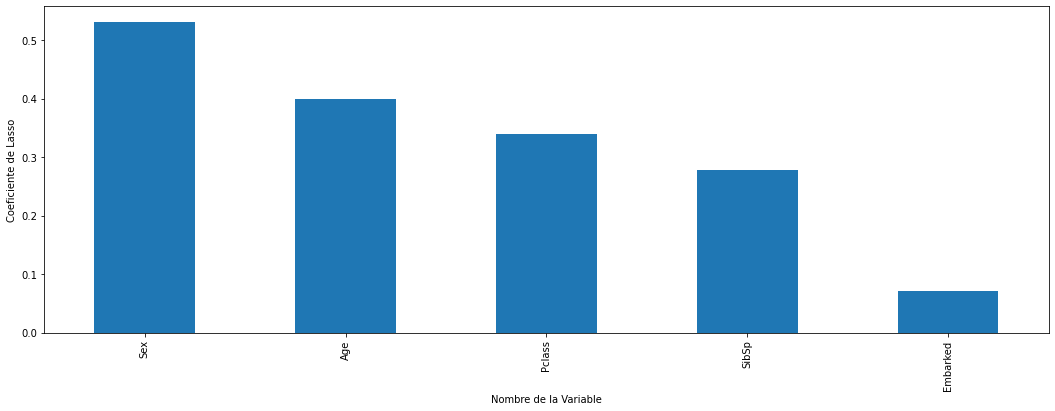

In [80]:
importance.plot.bar(figsize=(18, 6))
plt.ylabel("Coeficiente de Lasso")
plt.xlabel("Nombre de la Variable")
plt.show()

In [81]:
# Exportar el modelo como .joblib
import joblib

In [83]:
joblib.dump(linear_model, 'lasso_reg.joblib')

['lasso_reg.joblib']